# Olist Customer Segmentation
GitHub location: https://github.com/LarsTinnefeld/olist_ecom_analysis.git

This project is part of a larger Olist ecommerce business analysis and is the capstone project for the Udacity Data Science Nanodegree Program.

![logo](https://i2.wp.com/dataneophyte.com/wp-content/uploads/2019/12/Logo-01.png?resize=513%2C401&ssl=1)

## Questions to answer
1. What are the demographic relationship between customers?
2. How to target specific customer groups successfully?
3. How confident is the classification model?
---
## Table of Contents

I. [Data Import and Wrangling](#data)<br>
II. [Data Preparation](#preparation)<br>
III. [Exploratory Analysis](#eda)<br>
IV. [Customer Segmentation](#segmentation)<br>
V. [TBD](#tbd)<br>
VI. [Evaluation](#evaluation)<br>
VII. [Conclusion](#conclusion)

---
## <a class="anchor" id="data">I. Data Import and Wrangling</a>

### 1. Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Importing data

Data structure:

<img src="https://i.imgur.com/HRhd2Y0.png" width="700" height="450">

**Customer**

In [2]:
# Customer lookup table
df_customer = pd.read_csv("data/olist_customers_dataset.csv")

In [3]:
# Taking a peek
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


This looks like a complete dataset. Doublecheck:

In [9]:
df_customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
# Finding duplicates
df_customer.duplicated().sum()

0

In [17]:
n_customers = df_customer['customer_unique_id'].nunique()
print('Unique customers: {}'.format(n_customers))
n_cities = df_customer['customer_city'].nunique()
print('Unique cities: {}'.format(n_cities))

Unique customers: 96096
Unique cities: 4119


In [21]:
# City disctribution
df_customer['customer_city'].value_counts().sort_values(ascending=False)

sao paulo               15540
rio de janeiro           6882
belo horizonte           2773
brasilia                 2131
curitiba                 1521
                        ...  
itaju do colonia            1
santa rita do itueto        1
santa salete                1
bertolinia                  1
jamaica                     1
Name: customer_city, Length: 4119, dtype: int64

<AxesSubplot:>

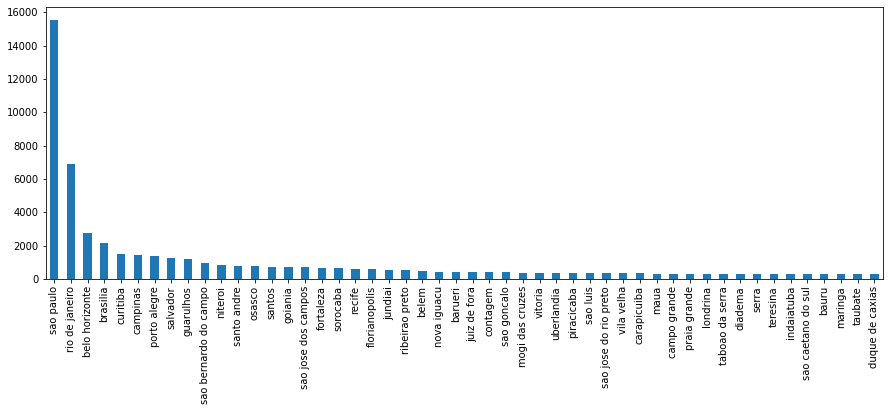

In [26]:
df_customer['customer_city']\
    .value_counts()\
    .sort_values(ascending=False)\
    .head(50)\
    .plot(kind='bar', figsize=(15, 5))

First impression: Data is clean. There is a high concentration of customers in Sao Paulo.

**Orders**

In [28]:
df_orders = pd.read_csv('data/olist_orders_dataset.csv')

In [29]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [30]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


There some dates missing:
- order_approved_at: 160 (data when order was approved)
- order_delivered_carriers_date: 1,783 (date when order was shipped by the carrier)
- order_delivered_customer_date: 2,965 (date when the product arrived at customer)